In [16]:
%matplotlib inline

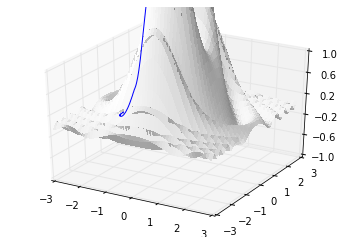

Hill climb minimum: -0.150249188381


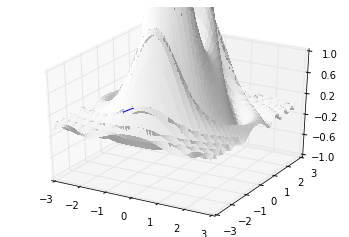

Hill climbing with random restarts minimum: -0.150220501779


/Users/siqilin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:131: RuntimeWarning: overflow encountered in double_scalars


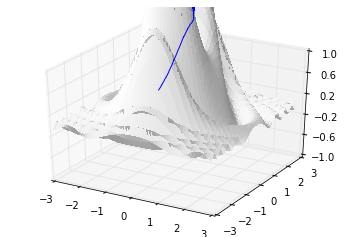

Simulated annealing minimum: 0.191287963619


In [17]:
# Name: Siqi Lin
# Instructor: Max Morawski
# Class: CMSC 471
# Project: Project 2
# Reference:
#  1. http://matplotlib.org/users/pyplot_tutorial.html
#  2. http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
#  3. https://en.wikipedia.org/wiki/Hill_climbing
import numpy as np
import sys
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def function_to_optimize(x,y):
    r = np.sqrt(x**2 + y**2)
    part1 = np.sin((x**2) + 3*(y**2))/(0.1 + (r**2))
    part2 = (x**2) + 5*(y**2)
    part3 = np.exp(1 - (r**2))/2
    #z = (x**2) + (y**2)    
    z = part1 + part2 * part3
    return z

def find_neighbors(current_state,step_size):
    neighbors = []
    x = current_state[0]
    y = current_state[1]
    neighbors.append([x-step_size,y])
    neighbors.append([x-step_size,y-step_size])
    neighbors.append([x,y-step_size])
    
    neighbors.append([x+step_size, y+step_size])
    neighbors.append([x+step_size,y])
    neighbors.append([x,y+step_size])
    
    neighbors.append([x-step_size,y+step_size])
    neighbors.append([x+step_size,y-step_size])

    return neighbors


def hill_climb(function_to_optimize, step_size,
                   xmin=-2.5,xmax=2.5,ymin=-2.5,ymax=2.5):
    # Intialize needed variables
    neighbors = []
    path = []
    isMin = True
    x = random.uniform(xmin,xmax)
    y = random.uniform(ymin,ymax)
    current_z = function_to_optimize(x,y)
    #set the starting node to be the current node
    current_node = [x,y,function_to_optimize(x,y)]
    
    while(isMin):
        neighbors = find_neighbors(current_node,step_size)
        next_node = []
        next_val = math.inf
        path.append(current_node)
        # Scan all the neighbors (8 different directions)
        for item in neighbors:
            item_val = function_to_optimize(item[0],item[1])
            if(item_val < next_val):
                # nextNode = item
                next_node = item
                next_node.append(item_val)
                next_val = item_val           
        if(next_val >= current_node[2]):
            # no better neighboring node is found
            return current_node,path
        current_node = next_node
        
def hill_climb_random_restarts(function_to_optimize, step_size,
                               num_restarts, xmin=-2.5, xmax=2.5, 
                               ymin=-2.5, ymax=2.5):

    # Initialize needed variables
    num_operation = num_restarts
    current_operation = 0
    best_z = 9999
    
    while(current_operation != num_operation):
        path = []
        current_state,path = hill_climb(function_to_optimize, step_size,xmin, xmax, ymin,ymax)
        #plot_hill_climb(path)
        current_operation += 1
        if(current_operation == num_operation - 1):
            plot_trace(path)
        if (current_state[2] < best_z):
            best_z = current_state[2]
        
    
    return current_state

def simulated_annealing(function_to_optimize,step_size=0.01,
                        max_temp=20,xmin=-2.5, xmax=2.5,
                       ymin=-2.5,ymax=2.5):
    # Initialize needed variables
    x = random.uniform(xmin,xmax)
    y = random.uniform(ymin,ymax)
    
    num_operation = 9999
    current_operation = 0
    current_z = function_to_optimize(x,y)
    current_state = [x,y]
    next_state = []
    T = max_temp
    path = []
    
    # for 0 to infinity
    while(current_operation != num_operation):
        T = T *(0.99**current_operation)
        current_operation+=1
        temp_state = [current_state[0],current_state[1],current_z]
        path.append(temp_state)
        if(T == 0):
            return current_z, path
        # Select a random sucessor
        next_index = random.randint(0,7)
        neighbors = find_neighbors(current_state,step_size)
        next_state = neighbors[next_index]
        # Calculate deltaE based on the current z value and the next z value
        next_z = function_to_optimize(next_state[0],next_state[1])
        #deltaE = next_z - current_z
        deltaE = current_z - next_z
        if(deltaE > 0):
            current_state = next_state
            current_z = function_to_optimize(current_state[0],current_state[1])
        elif((np.exp(deltaE/T)) >= (random.uniform(0,1))):
            current_state = next_state
            current_z = function_to_optimize(current_state[0],current_state[1])
            
def plot_trace(path):
    
    # Initialize varibales for plots
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    axis_x = np.arange(-3,3,0.1)
    axis_y = np.arange(-3,3,0.1)
    x_length = len(axis_x)
    y_length = len(axis_y)
    
    # Generate meshgrid and plot the origional function
    axis_x, axis_y = np.meshgrid(axis_x, axis_y)
    axis_z = function_to_optimize(axis_x,axis_y)  
    colortuple = ('w')
    colors = np.empty(axis_x.shape, dtype=str)
    for i in range(y_length):
        for j in range(x_length):
            colors[j, i] = colortuple[(j + i) % len(colortuple)]
    
    # plot the orgional function
    surf = ax.plot_surface(axis_x, axis_y, axis_z, rstride=1, cstride=1, 
                           facecolors=colors,
                           linewidth=0, antialiased=False)
    ax.set_zlim3d(-1, 1)
    ax.w_zaxis.set_major_locator(LinearLocator(6))
      
    # Categorize the x,y and z coordinates into three lists
    x_trace = []
    y_trace = []
    z_trace = []
    for trace in path:
        x_trace.append(trace[0])
        y_trace.append(trace[1])
        z_trace.append(trace[2])
    
    # plot the trace route
    ax.plot(x_trace,y_trace,z_trace)
    plt.show()
    
    
def main():
   
    hill_climb_path = []
    step_size = 0.01
    num_restarts = 20
    

    min_test,path = hill_climb(function_to_optimize,step_size,-2.5,2.5,-2.5,2.5)
    plot_trace(path)
    print("Hill climb minimum:",min_test[2])
    
    hc_random_min = hill_climb_random_restarts(function_to_optimize,step_size,num_restarts,-2.5,2.5,-2.5,2.5)
    print("Hill climbing with random restarts minimum:", hc_random_min[2])
    
    sa_min, sa_path = simulated_annealing(function_to_optimize,step_size,20,-2.5,2.5,-2.5,2.5)
    plot_trace(sa_path)
    print("Simulated annealing minimum:", sa_min)
        
main()